In [17]:
from sklearn import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import boto3
import pickle

In [18]:
# Specify your AWS access key and secret key
access_key = '<your-access-key>'
secret_key = '<your-secret-key>'

# Initialize the S3 resource with the access key and secret key
s3_resource = boto3.resource('s3', aws_access_key_id=access_key, aws_secret_access_key=secret_key)

# Specify the S3 bucket name and the CSV file object key
bucket_name = 'mlops-tut-anna'
object_key = 'DecisionTree/data/Salary_Data.csv'

try:
    # Retrieve the S3 object
    s3_object = s3_resource.Object(bucket_name, object_key)
    
    # Read the CSV data directly into a pandas DataFrame
    df = pd.read_csv(s3_object.get()['Body'])
    
    # Now you can work with the DataFrame 'df'
    #print(df.head())  # Display the first few rows of the CSV data
except Exception as e:
    print(f"An error occurred: {str(e)}")

In [19]:
my_data = df.copy()
my_data.head()

,Years,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [20]:
x=my_data.iloc[:,:-1].values
y=my_data.iloc[:,-1].values

In [21]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,train_size=0.8,random_state=42)

In [22]:
model=tree.DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [24]:
ans=model.predict(x_test)

In [25]:
metrics.mean_squared_error(ans,y_test)

101047709.83333333

In [26]:
pd.DataFrame({"y_pred":ans,"y_act":y_test})

,y_pred,y_act
0,116969.0,112635
1,66029.0,67938
2,101302.0,113812
3,66029.0,83088
4,54445.0,64445
5,63218.0,57189


In [27]:
my_data.head()

,Years,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


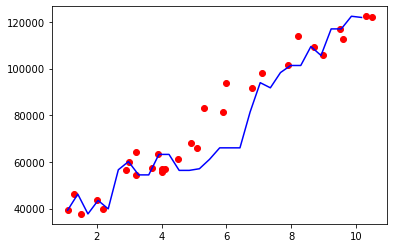

In [28]:
x_grid=np.arange(min(x),max(x),0.313)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color="red")
plt.plot(x_grid[:30,:].flatten(),model.predict(x),color="blue")
plt.show()

In [29]:
x_grid.shape

(31, 1)

In [14]:
model.predict(x).shape

(30,)

In [15]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [30]:
# Replace with your AWS credentials or use IAM roles
aws_access_key_id = '<your-access-key>'
aws_secret_access_key = '<your-secret-key>'

# Replace with your S3 bucket name and desired object key (file name)
bucket_name = 'mlops-tut-anna'
object_key = 'DecisionTree/models/modelv1.pkl'



# Serialize the model to a binary format using pickle
model_bytes = pickle.dumps(model)

# Create an S3 client
s3 = boto3.client('s3', aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_access_key)

# Upload the model bytes to the S3 bucket
s3.put_object(Bucket=bucket_name, Key=object_key, Body=model_bytes)

{'ResponseMetadata': {'RequestId': 'YG6VQVKVYNTX1PSG',
  'HostId': 'VaujKWkIxDiH9hqJw+gZUGP5cj6nPoOh9gXfJeiM6HfmFWE25jAWoj3Bqil8Exm6leDoAFGR1Uf7u3cNZ8evng==',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'VaujKWkIxDiH9hqJw+gZUGP5cj6nPoOh9gXfJeiM6HfmFWE25jAWoj3Bqil8Exm6leDoAFGR1Uf7u3cNZ8evng==',
   'x-amz-request-id': 'YG6VQVKVYNTX1PSG',
   'date': 'Sun, 08 Oct 2023 08:04:22 GMT',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"88ab576d5779be2044ef5c5499ef00b1"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"88ab576d5779be2044ef5c5499ef00b1"',
 'ServerSideEncryption': 'AES256'}